In [42]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt
import numpy as np


In [28]:
# img = Image.open("../dataset/Image/Face/102190021.jpg").convert(mode="L")
# axes = plt.subplot(1,2,1)
# axes.imshow(img)
# data = np.array(img)
# shape = data.shape
# data2 = data[int(shape[0]/2 - 250) : int(shape[0]/2 +100), :]
# img = Image.fromarray(data2).resize((70,70))
# axes = plt.subplot(1,2,2)
# axes.imshow(img)

In [44]:
import os
SIZE = (100,100)
def getData(n = 1000):
    result = []
    count = 0
    for path in os.listdir("../dataset/Image/Face/"):
        if os.path.isfile(os.path.join("../dataset/Image/Face/", path)):
            count += 1
            result.append(Image.open(os.path.join("../dataset/Image/Face/", path)).convert(mode="L"))
        if count >= n:
            break
    return result

def ChopAndConvert(image: Image.Image):
    data = np.array(image)
    shape = data.shape
    data2 = data[int(shape[0]/4) : int(shape[0]*3/4), :]
    image = Image.fromarray(data2).resize(SIZE)
    return image

def Normalize(array: np.ndarray):
    return array / 255


In [45]:
dataset = getData(1000)
for i in range(len(dataset)):
    # Cắt và chuyển chế độ ảnh
    img = ChopAndConvert(dataset[i])
    # Làm phẳng ảnh
    dataset[i] = np.array(img).reshape((SIZE[0]*SIZE[1], ))


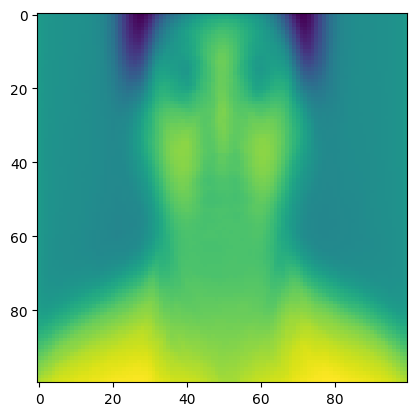

In [46]:
average = sum(np.array(dataset) / len(dataset))
dataset_after_subtract = np.array([arr - average for arr in dataset])
plt.imshow(average.reshape(SIZE))


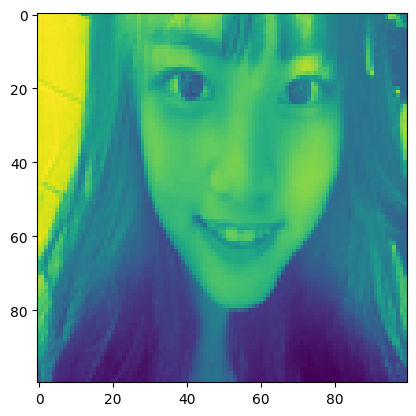

In [18]:
plt.imshow(dataset_after_subtract[0].reshape(SIZE))

In [34]:
inv = np.linalg.pinv(dataset_after_subtract)
print(inv.max())

3516943.202723797


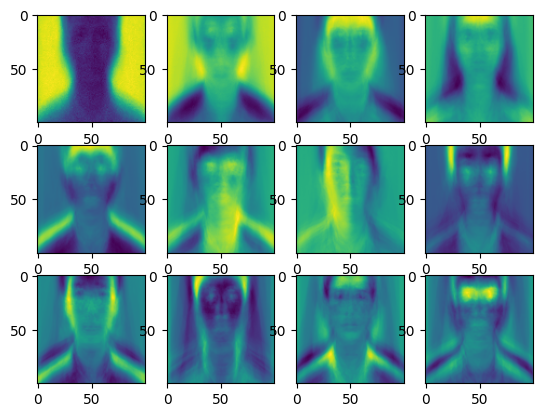

In [34]:
K = 100
C_quote = dataset_after_subtract.dot(dataset_after_subtract.T)

w, v = np.linalg.eig(C_quote)
Keigenvalue = w[0:K]
Keigenvector = v[:, 0:K]
Keigenvector = inv.dot(Keigenvector)
Keigenvector = Keigenvector.astype(dtype='float64')
Keigenvector : np.ndarray
index = 0
for i in range(4):
    for j in range(3):
        index += 1
        axe = plt.subplot(3,4, index)
        axe.imshow(Keigenvector[:, index-1].reshape(SIZE))

In [35]:
Keigenvector.shape

(10000, 100)

In [45]:
# inv = np.linalg.inv(Keigenvector.T.dot(Keigenvector)).dot(Keigenvector.T)
inv2 = np.linalg.pinv(Keigenvector)
W = inv2.dot(dataset_after_subtract[0].reshape(-1,1))
data_result = Keigenvector.dot(W.reshape(-1,1))
print(W)

[[-3.37299297e+08]
 [ 2.92801771e+08]
 [-1.19043987e+07]
 [ 1.98005620e+07]
 [ 3.72563913e+07]
 [-7.72655316e+06]
 [-7.18506323e+06]
 [ 5.80614107e+06]
 [ 2.82635737e+07]
 [-3.77312423e+06]
 [-4.67892278e+05]
 [ 7.55376145e+06]
 [-3.66975352e+06]
 [-1.18230077e+07]
 [ 8.19251729e+06]
 [ 4.02051116e+06]
 [ 7.07345690e+06]
 [ 5.57391130e+05]
 [ 6.97937565e+06]
 [ 4.18376122e+06]
 [-1.72593439e+06]
 [ 2.39406690e+06]
 [-5.97054400e+06]
 [-2.37823266e+06]
 [ 7.57485011e+06]
 [-5.47145016e+06]
 [-2.30902460e+06]
 [-1.36420871e+05]
 [-8.80871419e+05]
 [ 9.45526231e+05]
 [ 5.73238239e+06]
 [-2.60441215e+06]
 [-3.36080226e+06]
 [-3.81249450e+05]
 [ 5.50166811e+05]
 [-5.79978892e+05]
 [ 1.52515901e+06]
 [ 2.34123609e+06]
 [ 4.43799956e+06]
 [-5.92702208e+05]
 [-1.02133094e+06]
 [ 5.34665047e+06]
 [-2.49369992e+06]
 [-2.61734794e+06]
 [-1.08994270e+06]
 [ 1.29821481e+06]
 [-1.55244044e+06]
 [-2.36192604e+06]
 [-2.37616817e+05]
 [-2.14087712e+06]
 [ 9.87929399e+05]
 [ 7.67825286e+05]
 [-9.8773927

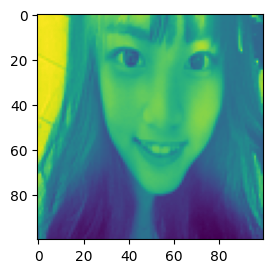

In [41]:
plt.subplot(1,2,2).imshow(dataset_after_subtract[0].reshape(SIZE))

In [51]:
### tìm ảnh giống ảnh thứ nhất trong tập dataset
min = np.Inf
result = dataset_after_subtract[0]
i = 0
for data in dataset_after_subtract:
    i += 1
    W_temp = data
    norm = np.linalg.norm(dataset_after_subtract[0] - W_temp)
    if norm < min and norm != 0:
        min = np.linalg.norm(dataset_after_subtract[0] - W_temp)
        result = i
print(result)

2


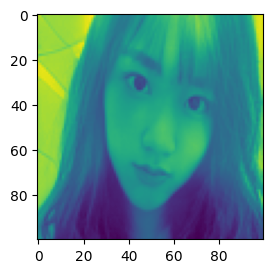

In [52]:
plt.subplot(1,2,2).imshow(dataset_after_subtract[1].reshape(SIZE))

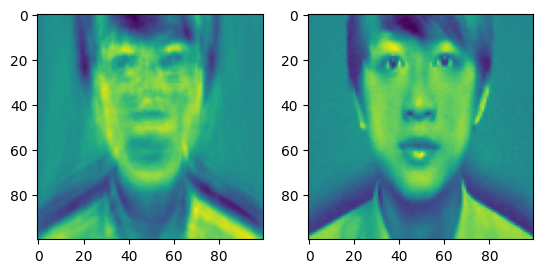

In [39]:
img_check = Keigenvector.dot(W)
plt.subplot(1,2,1).imshow(img_check.reshape(SIZE))
plt.subplot(1,2,2).imshow(dataset_after_subtract[663].reshape(SIZE))

## Thử nghiệm nhận diện gương mặt

In [47]:
inv = np.linalg.pinv(dataset_after_subtract)
C_quote = dataset_after_subtract.dot(dataset_after_subtract.T)

w, v = np.linalg.eig(C_quote)

In [65]:
index = 7
for K in [5,10, 100, 1000, 10000]:
    Keigenvalue = w[0:K]
    Keigenvector = v[:, 0:K]
    Keigenvector = inv.dot(Keigenvector)
    Keigenvector = Keigenvector.astype(dtype='float64')
    Keigenvector : np.ndarray

    inv2 = np.linalg.pinv(Keigenvector)
    W = inv2.dot(dataset_after_subtract[index].reshape(-1,1))

    min = np.Inf
    result = 0
    i = -1
    for data in dataset_after_subtract:
        i += 1
        W_temp = inv2.dot(data.reshape(-1,1))
        norm = np.linalg.norm(W - W_temp)
        if norm < min and norm != 0:
            min = np.linalg.norm(W - W_temp)
            result = i
    print(f"{K} : {index} giống với {result}")

5 : 7 giống với 9
10 : 7 giống với 9
100 : 7 giống với 9
1000 : 7 giống với 9
10000 : 7 giống với 9


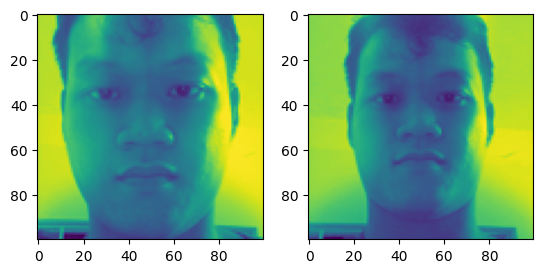

In [66]:
plt.subplot(1,2,1).imshow(dataset_after_subtract[7].reshape(SIZE))
plt.subplot(1,2,2).imshow(dataset_after_subtract[9].reshape(SIZE))